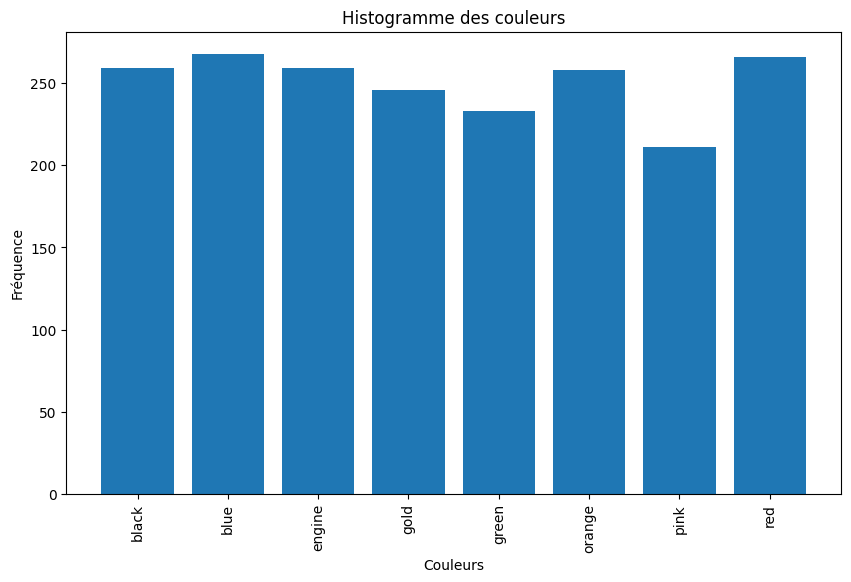

In [40]:
import numpy as np
import matplotlib.pylab as plt

colors = ['red','blue','gold','black','orange','green','pink','engine']

def new_visible_cards(visible_cards):
    new_visible_cards = np.concatenate([visible_cards, np.random.choice(colors, 4-len(visible_cards))])
    return new_visible_cards



def select_cards_one_turn(strategy, visible_cards_input):
    visible_cards = new_visible_cards(visible_cards_input)
    is_2, is_1 = False, False
    for color in strategy:
        if np.count_nonzero(visible_cards == color) == 2:
            is_2 = True
            color2 = color
        if np.count_nonzero(visible_cards == color) == 1:
            is_1 = True
            color1 = color
    if is_2:
        indices_delete = np.where(visible_cards == color2)[0]
        visible_cards = np.delete(visible_cards, indices_delete[0])
        visible_cards = np.delete(visible_cards, indices_delete[0])
        return [color2,color2], visible_cards
    if is_1:
        indices_delete = np.where(visible_cards == color1)[0]
        visible_cards = np.delete(visible_cards, indices_delete[0])
        return [color1, np.random.choice(colors)], visible_cards
    else:
        return np.random.choice(colors,2) , visible_cards

startegy = ['red','blue','gold']   
visible_cards_current =  ['red','black','pink']
collection = []

for i in range(1000):
    new_cards, visible_cards_current = select_cards_one_turn(startegy, visible_cards_current)
    collection = np.concatenate([new_cards, collection])
    visible_cards = new_visible_cards(visible_cards)

unique_colors, counts = np.unique(collection, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique_colors, counts)
plt.xticks(rotation=90)
plt.xlabel('Couleurs')
plt.ylabel('Fréquence')
plt.title('Histogramme des couleurs')
plt.show()